In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2021-04-08 15:16:57.645947


<h1>Tilastollisia tunnuslukuja</h1>

Määrällisille muuttujille kannattaa laskea: 

<ul>
<li>arvojen lukumäärä</li>
<li>keskiarvo</li>
<li>keskihajonta</li>
<li>viiden luvun yhteenveto (pienin, alaneljännes, mediaani, yläneljännes, suurin).</li>
</ul>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tyyli vaikuttaa grafiikan ulkoasuun
# Käytettävissä olevat tyylit voit listata komennolla plt.style.available
plt.style.use('seaborn-whitegrid')

In [3]:
# Datan avaaminen
df = pd.read_excel('http://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


<h2>describe() laskee tilastolliset tunnusluvut</h2>

In [4]:
df.describe()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
count,82.000000,82.000000,82.000000,82.000000,81.000000,80.000000,82.000000,82.000000,81.000000,82.000000,82.000000,82.000000,47.0,20.0,9.0,22.0
mean,41.500000,1.231707,37.951220,1.621951,1.987654,12.175000,2563.878049,3.060976,4.061728,3.219512,2.109756,3.195122,1.0,1.0,1.0,1.0
std,23.815261,0.424519,9.773866,0.487884,0.844006,8.807038,849.350302,1.058155,0.826826,1.154961,1.111179,1.047502,0.0,0.0,0.0,0.0
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,1521.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
25%,21.250000,1.000000,31.000000,1.000000,1.000000,3.750000,2027.000000,2.000000,4.000000,3.000000,1.000000,3.000000,1.0,1.0,1.0,1.0
50%,41.500000,1.000000,37.500000,2.000000,2.000000,12.500000,2320.000000,3.000000,4.000000,3.000000,2.000000,3.000000,1.0,1.0,1.0,1.0
75%,61.750000,1.000000,44.000000,2.000000,3.000000,18.250000,2808.000000,4.000000,5.000000,4.000000,3.000000,4.000000,1.0,1.0,1.0,1.0
max,82.000000,2.000000,61.000000,2.000000,4.000000,36.000000,6278.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.0,1.0,1.0


In [5]:
# Tilastollisia tunnuslukuja valituille muuttujille kahdella desimaalilla
df1 = df[['ikä', 'palveluv', 'palkka']].describe().round(2)

# Suomenkieliset nimet tunnusluvuille
df1.index = ['Lukumäärä', 'Keskiarvo', 'Keskihajonta', 'Pienin', 'Alaneljännes', 'Mediaani', 'Yläneljännes', 'Suurin']

# Otsikoiden viimeistely
df1.columns = ['Ikä', 'Palveluvuodet', 'Palkka']

df1

,Ikä,Palveluvuodet,Palkka
Lukumäärä,82.00,80.00,82.00
Keskiarvo,37.95,12.18,2563.88
Keskihajonta,9.77,8.81,849.35
Pienin,20.00,0.00,1521.00
Alaneljännes,31.00,3.75,2027.00
Mediaani,37.50,12.50,2320.00
Yläneljännes,44.00,18.25,2808.00
Suurin,61.00,36.00,6278.00


In [6]:
# Tilastollisia tunnuslukuja tyytyväisyyksille
df2 = df[['johto', 'työtov', 'työymp', 'palkkat', 'työteht']].describe()

# Järjestys keskiarvon mukaan suurimmasta pienimpään
df2 = df2.sort_values(by = 'mean', axis = 1, ascending = False)

df2

,työtov,työymp,työteht,johto,palkkat
count,81.000000,82.000000,82.000000,82.000000,82.000000
mean,4.061728,3.219512,3.195122,3.060976,2.109756
std,0.826826,1.154961,1.047502,1.058155,1.111179
min,2.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,3.000000,2.000000,1.000000
50%,4.000000,3.000000,3.000000,3.000000,2.000000
75%,5.000000,4.000000,4.000000,4.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
# Otsikoin äskeisen taulukon uudelleen
otsikot = ['Työtovereihin, n=' + str(int(df2.loc[('count', 'työtov')])),
           'Työympäristöön, n=' + str(int(df2.loc[('count', 'työymp')])),
           'Työtehtäviin, n=' + str(int(df2.loc[('count', 'työteht')])),
           'Johtoon, n=' + str(int(df2.loc[('count', 'johto')])),
           'Palkkaan, n=' + str(int(df2.loc[('count', 'palkkat')]))]

df2.columns = otsikot

df2

,"Työtovereihin, n=81","Työympäristöön, n=82","Työtehtäviin, n=82","Johtoon, n=82","Palkkaan, n=82"
count,81.000000,82.000000,82.000000,82.000000,82.000000
mean,4.061728,3.219512,3.195122,3.060976,2.109756
std,0.826826,1.154961,1.047502,1.058155,1.111179
min,2.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,3.000000,2.000000,1.000000
50%,4.000000,3.000000,3.000000,3.000000,2.000000
75%,5.000000,4.000000,4.000000,4.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


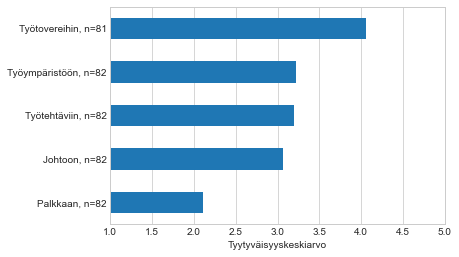

In [8]:
# Keskiarvot pylväinä keskiarvojen mukaisessa järjestyksessä
df2.loc['mean'].sort_values().plot.barh()

# Vaaka-akselin otsikointi ja skaalaus
plt.xlabel('Tyytyväisyyskeskiarvo')
plt.xlim(1, 5)

# seaborn-whitegrid -tyyli sisältää vaaka- ja pystysuuntaisen taustaviivoituksen
# tässä kumotaan vaakasuuntainen taustaviivoitus
plt.grid(axis = 'y')

<h2>Seaborn-kirjastoa kannattaa hyödyntää</h2>

(1.0, 5.0)

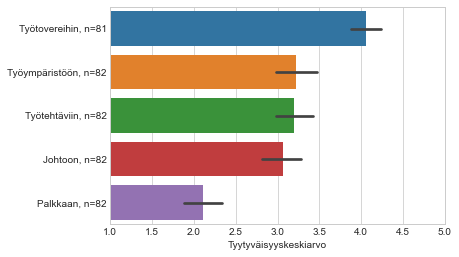

In [14]:
# Tyytyväisyyskeskiarvot seaborn-kirjaston barplot-kaaviona; mukaan tulee myös keskiarvojen virhemarginaalit
# Pelkkä data = df riittää, jos en halua määrittää pylväiden järjestystä
# orient = 'h' tarkoittaa vaakapylväitä (horizontal)
sns.barplot(data = df[['työtov', 'työymp', 'työteht', 'johto', 'palkkat']], orient = 'h')

plt.xlabel('Tyytyväisyyskeskiarvo')
plt.yticks(ticks = [0, 1, 2, 3, 4], labels = otsikot)

# Akselin skaalaus 1-5
plt.xlim(1, 5)

Text(0.5, 0, 'Kuukausipalkka, n=82')

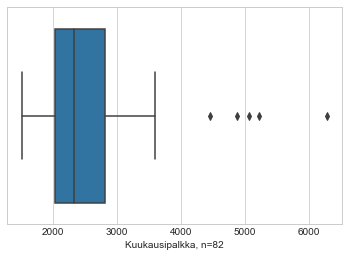

In [15]:
# Viiden luvun yhteenveto (pienin, alaneljännes, mediaani, yläneljännes, suurin) seabornin boxplottina
# Huomattavan paljon muista poikkeavat havainnot erillisinä pisteinä
sns.boxplot(x = df['palkka'])

plt.xlabel('Kuukausipalkka, n=' + str(df['palkka'].count()))

([<matplotlib.axis.YTick at 0x111cecf9e80>,
 [Text(0, 0, 'Työtovereihin, n=81'),
  Text(0, 1, 'Työympäristöön, n=82'),
  Text(0, 2, 'Työtehtäviin, n=82'),
  Text(0, 3, 'Johtoon, n=82'),
  Text(0, 4, 'Palkkaan, n=82')])

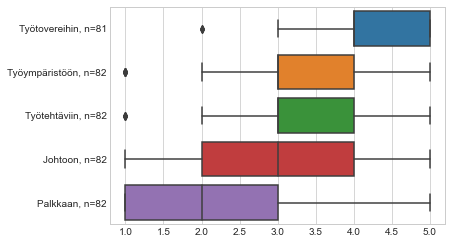

In [17]:
# Viiden luvun yhteenveto tyytyväisyyksistä boxplottina
# data-parametria käyttämällä saat useita muuttujia samaan boxplottiin
sns.boxplot(data = df[['työtov', 'työymp', 'työteht', 'johto', 'palkkat']], orient = 'h')

plt.yticks(ticks = [0, 1, 2, 3, 4], labels = otsikot)

<h2>Lisätietoa</h2>

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
- https://seaborn.pydata.org/generated/seaborn.barplot.html
- https://seaborn.pydata.org/generated/seaborn.boxplot.html
    
Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/